In [24]:
import numpy as np

In [25]:
import pandas as pd

In [26]:
import matplotlib.pyplot as plt


INITIAL NUMBER DENSITY OF NS.

In [27]:
 def initial_n(): #initialise no.of neutrons per unit volume at r=0

   n=1
   err=1
   tol=1e-15  #tolerance value: the diff btwn max&min dimensions of permissble errors
   count=0
   #newton raphson method
   while err > tol:
    count+=1 #increment count value
    fn = 236*n**(2.54)+n*mn - rho_s #f
    dfn = 236*2.54*n**(1.54)+mn        #f'
    temp = n - fn/dfn
    err=np.abs(n-temp) #abosolute function to convert -ve values to +ve values
    n=temp
   print("Newton-Raphson Converged after", count,"iterations")
   return n

ENERGY DENSITY OF NS


In [28]:
def rho(p):

  n = (p*rho_s/363.44)**(1/2.54)
  return (236.*n**2.54 + n*mn)/rho_s

  '''
  energy density at given pressure
  rho_s - central density at r = 0
  mn  - mass of neutron
  n - num density at given pressure
  '''

PRESSURE GRADIENT OF NS

In [29]:
def dp_dr(r,m,p,flag): #flag-choose btwn classical &relativistic models
 '''
r = radius
m= mass w.r.t r
p=pressure w.r.t r
'''

 if flag == 0:
    y = -m * rho(p) /(r**2 + 1e-20) #classical model
 else:
    y = -(p + rho(p))*(m + p*r**3)/(r**2 -2*m*r + 1e-20) #relativistic model
 return y




MASS GRADIENT

In [30]:
def dm_dr(r,m,p):
  #use same as pressure gradient
  return rho(p)*r**2

RK4

In [31]:
def RK4Solver(r,m,p,h,flag):

    '''
    Runge - Kutta 4th order Method
    Calculates 4 different pressure and mass gradients
    K1_ - Mass Gradients
    K2_ - Pressure Gradients
    '''
    y = np.zeros(2)                                               # To store the next value of m and p

    # Gradient 1 at start point
    k11 = dm_dr(r, m, p)
    k21 = dp_dr(r, m, p, flag)

    # Gradient 2 at mid of start and end point
    k12 = dm_dr(r + 0.5*h, m + 0.5*k11*h, p + 0.5*k21*h)
    k22 = dp_dr(r + 0.5*h, m + 0.5*k11*h, p + 0.5*k21*h, flag)
    # Gradient 3 at mid of start and end point
    k13 = dm_dr(r + 0.5*h, m + 0.5*k12*h, p + 0.5*k22*h)
    k23 = dp_dr(r + 0.5*h, m + 0.5*k12*h, p + 0.5*k22*h, flag)

    # Gradient 4 at end point
    k14 = dm_dr(r + h, m + k13*h, p + k23*h)
    k24 = dp_dr(r + h, m + k13*h, p + k23*h, flag)

    # Updation of m and p
    y[0] = m + h*(k11 + 2*k12 + 2*k13 + k14)/6
    y[1] = p + h*(k21 + 2*k22 + 2*k23 + k24)/6

    return y

PLOT THE DATA

In [32]:
def plot_data(color,label):
  #mass
  plt.subplot(1,2,1)
  plt.plot(r*r0*1e-18, m*M0/Ms, color=color,linewidth=1.2,label=label)
  plt.xlabel('distance, $r$(km),fontsize=13')
  plt.ylabel('Mass, $M/M_{sun}$,fontsize=13')
  plt.title('Mass profile of a Neutron Star',color='black',weight='bold',fontsize=13)
  plt.xlim(left=0)
  plt.ylim(bottom=0)
  plt.legend(fontsize=13,frameon=False)



  #pressure
  plt.subplot(1,2,2)
  plt.plot(r*r0*1e-18, p*rho_s, color=color,linewidth=1.2,label=label)
  plt.xlabel('distance, $r$(km),fontsize=13')
  plt.ylabel('Pressure, $P$ $(MeV/fm^{3}$),fontsize=13')
  plt.title('Pressure profile of a Neutron Star',color='black',weight='bold',fontsize=13)
  plt.xlim(left=0)
  plt.ylim(bottom=0)
  plt.legend(fontsize=13,frameon=False)



In [33]:
#simulation of parameters and conversion factors

hc=197.327   #conversion factor in MeV
G=  hc*6.67259e-45   #gravitional const
Ms=1.1157467e60  #mass of sun
rho_s=1665.3  #central density of NS
M0=(4*3.14159265*(G**3)*rho_s)**(-0.5)
r0=G*M0
mn=938.926  #mass of NS

INITIALISE VALUES

In [34]:
#Value of radius,
N=1501
r=np.linspace(0,15,N)
h=r[1]-r[0]#stepsize
tol=9e-5 #tolerance value

In [35]:
#array to store the values
m = np.zeros(N)
p = np.zeros(N)

In [36]:
#initial num denaity
ni = initial_n()

Newton-Raphson Converged after 5 iterations


In [37]:
#set initial values
r[0] = 0
m[0] = 0
p[0] = 363.44*(ni**2.54)/rho_s

In [38]:
flag_set=[0,1]

In [39]:
print("Initial number density, ni=", ni)

Initial number density, ni= 1.2918969375342138


In [40]:
print("Initial Pressure, p[0] = ",p[0]*rho_s, "MeV/fm^3" )

Initial Pressure, p[0] =  696.5487390842761 MeV/fm^3


In [41]:
print("Simulation range, R = 0 to R =", r[-1]*r0*1e-18,"km" )

Simulation range, R = 0 to R = 90.36486611870906 km


In [42]:
print("Step size for RK4 is ", h)

Step size for RK4 is  0.01


MODEL THE NEUTRON STAR WITH FOR LOOP


Classical Model Results: P < 9e-05 found after 275 runs
Initial density, rho_s =  1665.3 MeV/fm^3
Total mass =  10.075592302895434 times Solar mass
Radius of the Neutron star =  16.627135365842467 km

Relativistic Model Results: P < 9e-05 found after 161 runs
Initial density, rho_s =  1665.3 MeV/fm^3
Total mass =  1.878156929086536 times Solar mass
Radius of the Neutron star =  9.759405540820579 km



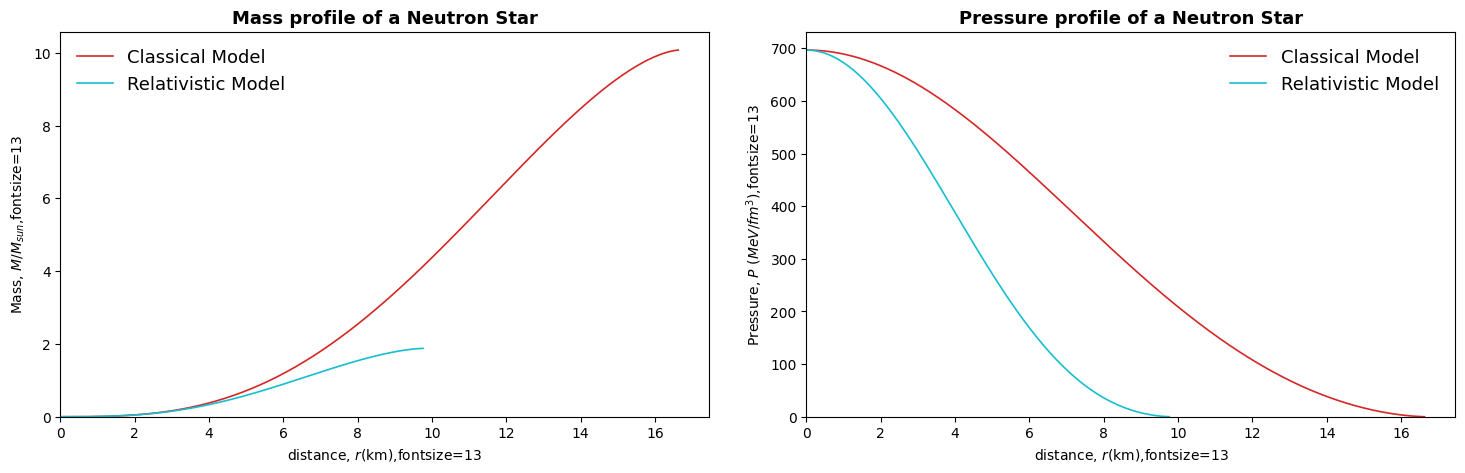

In [43]:
plt.figure(figsize = (18, 5))
for k in range(0,2):
    flag = flag_set[k]
    for i in range(0,N-1):
        if flag == 0:
           [m[i+1], p[i+1]] = RK4Solver(r[i],m[i],p[i],h,flag) # use classical model
        else:
           [m[i+1], p[i+1]] = RK4Solver(r[i],m[i],p[i],h,flag) # use relativistic model
        if p[i+1] < tol:                                        # if the value of the pressure goes below tolerance (close to 0 as we know)
            break                                               # the simulation is completed
    print()
    if i == N-2:                                                # if the pressure value was not able to go below the tolerance value
        lbl1 = "Program didn't converge to P = 0, extend the maximum value of r"
    else:                                                       # if simulation stopped before this
        lbl1 = f"P < {tol} found after {i} runs"

    m = m[:i+2] # m[0:i+2 --> Exclusive index]
    p = p[:i+2]
    r = r[:i+2]

    if flag == 0:
        lbl = "Classical Model"
        plot_data('tab:red', "Classical Model")
    else:
        lbl = "Relativistic Model"
        plot_data('tab:cyan', "Relativistic Model")

    print ("=====================================================")
    print (lbl, "Results:", lbl1)
    print ("=====================================================")
    print ("Initial density, rho_s = ", rho_s, "MeV/fm^3")
    print ("Total mass = ", m[-1]*M0/Ms, "times Solar mass")
    print ("Radius of the Neutron star = ", r[-1]*r0*1e-18, "km")

print()
plt.subplots_adjust(wspace = 0.15)

In [44]:
np.linspace(0,15,1502)[275]

2.748167888074617

In [45]:
np.linspace(0,15,1502)[275]*r0

1.6555854885173211e+19

In [46]:
np.linspace(0,15,1502)[275]*r0*1e-18

16.55585488517321

In [47]:
np.linspace(0,15,1502)[275]*r0*1e-20

0.1655585488517321

In [48]:
np.linspace(0,15,1502)[162]*r0

9.752903605083855e+18

In [49]:
np.linspace(0,15,1502)[162]*r0*1e-18

9.752903605083855

In [50]:
Energy = rho(p)
print("Initial energy. density, E = ", Energy)

Initial energy. density, E =  [1.         0.99992096 0.99970704 0.99935132 0.99885366 0.99821422
 0.99743324 0.99651107 0.99544809 0.99424476 0.99290157 0.99141911
 0.989798   0.98803892 0.98614261 0.98410988 0.98194158 0.97963861
 0.97720194 0.97463258 0.97193159 0.96910009 0.96613925 0.96305029
 0.95983446 0.95649308 0.9530275  0.94943913 0.94572939 0.94189978
 0.93795183 0.93388709 0.92970716 0.92541368 0.92100833 0.91649281
 0.91186886 0.90713824 0.90230276 0.89736423 0.89232452 0.88718549
 0.88194905 0.87661711 0.87119163 0.86567455 0.86006786 0.85437354
 0.84859361 0.84273009 0.836785   0.83076039 0.82465831 0.81848081
 0.81222996 0.80590781 0.79951644 0.79305792 0.78653432 0.7799477
 0.77330014 0.76659368 0.75983039 0.75301231 0.74614149 0.73921996
 0.73224974 0.72523283 0.71817124 0.71106696 0.70392194 0.69673815
 0.68951752 0.68226197 0.67497339 0.66765368 0.66030469 0.65292825
 0.64552619 0.6381003  0.63065235 0.62318407 0.6156972  0.60819342
 0.60067439 0.59314176 0.58559714

In [51]:
Press = dp_dr(r,m,p,flag=0)
print("Pressure per Unit, P = ", Press)

Pressure per Unit, P =  [-0.         -0.00333283 -0.00666348 -0.00998956 -0.01330882 -0.016619
 -0.01991785 -0.02320313 -0.02647263 -0.02972415 -0.03295549 -0.03616451
 -0.03934907 -0.04250707 -0.04563643 -0.04873512 -0.05180112 -0.05483248
 -0.05782726 -0.06078357 -0.06369957 -0.06657346 -0.0694035  -0.07218796
 -0.07492522 -0.07761365 -0.08025173 -0.08283794 -0.08537086 -0.08784911
 -0.09027137 -0.09263638 -0.09494292 -0.09718988 -0.09937616 -0.10150074
 -0.10356269 -0.10556111 -0.10749516 -0.10936409 -0.11116721 -0.11290387
 -0.11457351 -0.11617562 -0.11770975 -0.11917553 -0.12057265 -0.12190084
 -0.12315991 -0.12434974 -0.12547025 -0.12652143 -0.12750333 -0.12841606
 -0.12925977 -0.13003469 -0.13074109 -0.1313793  -0.13194969 -0.1324527
 -0.1328888  -0.13325853 -0.13356246 -0.13380122 -0.13397546 -0.13408589
 -0.13413327 -0.13411838 -0.13404206 -0.13390516 -0.13370858 -0.13345325
 -0.13314015 -0.13277025 -0.13234458 -0.1318642  -0.13133017 -0.13074359
 -0.13010558 -0.12941728 -0.12

In [52]:
Press = dp_dr(r,m,p,flag=1)
print("Pressure per Unit, P = ", Press)

Pressure per Unit, P =  [-0.         -0.0106583  -0.02130963 -0.03194676 -0.04256263 -0.05315021
 -0.06370247 -0.07421244 -0.08467318 -0.09507781 -0.10541951 -0.11569153
 -0.12588717 -0.13599985 -0.14602304 -0.15595033 -0.1657754  -0.17549203
 -0.18509412 -0.1945757  -0.2039309  -0.21315401 -0.22223943 -0.23118172
 -0.23997556 -0.24861581 -0.25709746 -0.26541569 -0.27356581 -0.28154331
 -0.28934386 -0.29696329 -0.30439762 -0.31164302 -0.31869588 -0.32555276
 -0.33221039 -0.3386657  -0.34491582 -0.35095806 -0.35678992 -0.36240909
 -0.36781346 -0.3730011  -0.37797029 -0.38271949 -0.38724736 -0.39155274
 -0.39563466 -0.39949236 -0.40312524 -0.40653291 -0.40971514 -0.4126719
 -0.41540333 -0.41790975 -0.42019166 -0.42224973 -0.42408479 -0.42569785
 -0.42709007 -0.42826277 -0.42921745 -0.42995574 -0.43047942 -0.43079043
 -0.43089083 -0.43078284 -0.43046881 -0.42995119 -0.42923261 -0.42831578
 -0.42720355 -0.42589886 -0.42440478 -0.42272448 -0.42086123 -0.4188184
 -0.41659944 -0.41420791 -0.4

In [53]:
Mass = dm_dr(r,m,p)
print("Mass per Unit, M = ", Mass)

Mass per Unit, M =  [0.00000000e+00 9.99920963e-05 3.99882815e-04 8.99416189e-04
 1.59816586e-03 2.49553554e-03 3.59075968e-03 4.88290426e-03
 6.37086780e-03 8.05338252e-03 9.92901571e-03 1.19961712e-02
 1.42530911e-02 1.66978577e-02 1.93283952e-02 2.21424724e-02
 2.51377045e-02 2.83115559e-02 3.16613429e-02 3.51842360e-02
 3.88772635e-02 4.27373141e-02 4.67611399e-02 5.09453604e-02
 5.52864651e-02 5.97808177e-02 6.44246593e-02 6.92141124e-02
 7.41451844e-02 7.92137719e-02 8.44156645e-02 8.97465489e-02
 9.52020130e-02 1.00777550e-01 1.06468563e-01 1.12270369e-01
 1.18178204e-01 1.24187225e-01 1.30292518e-01 1.36489100e-01
 1.42771923e-01 1.49135881e-01 1.55575812e-01 1.62086504e-01
 1.68662699e-01 1.75299096e-01 1.81990358e-01 1.88731115e-01
 1.95515968e-01 2.02339494e-01 2.09196250e-01 2.16080778e-01
 2.22987607e-01 2.29911260e-01 2.36846255e-01 2.43787113e-01
 2.50728357e-01 2.57664520e-01 2.64590146e-01 2.71499796e-01
 2.78388049e-01 2.85249508e-01 2.92078801e-01 2.98870587e-01
 3.0

In [54]:
print("initial Pressure , p[0] = ", p[0]*rho_s,"MeV/fm^3")

initial Pressure , p[0] =  696.5487390842761 MeV/fm^3


In [56]:
print("Simulation range, R = 0 to R = ", r[-1]*r0*1e-18,"km")

Simulation range, R = 0 to R =  9.759405540820579 km


In [57]:
print("step size for RK4 is ", h)

step size for RK4 is  0.01


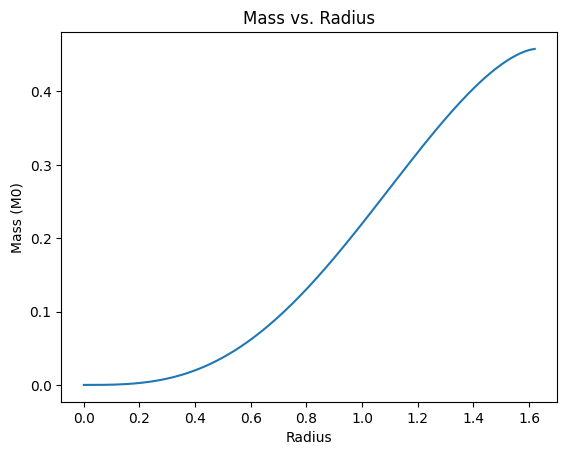

In [58]:
plt.plot(r,m)
plt.title("Mass vs. Radius")
plt.xlabel("Radius")
plt.ylabel("Mass (M0)")
plt.show()

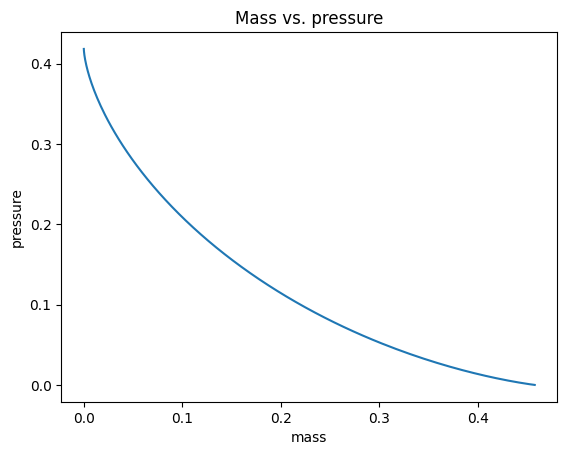

In [59]:
plt.plot(m,p)
plt.title("Mass vs. pressure")
plt.xlabel("mass")
plt.ylabel("pressure")
plt.show()